In [2]:
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import os
import scipy.stats                # statistics
from sklearn import preprocessing


In [3]:
df = pd.read_csv("/content/cereal.csv")

# Print the head of df
print(df.head())

# Print the info of df
print(df.info())

# Print the shape of df
print(df.shape)

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #

It looks like we have information for 77 cereals across 16 variables: name, brand and nutrition facts.

### **Basic Exploratory Data Analysis**

In [4]:
df.iloc[:,~df.columns.isin(['name','mfr','type','rating'])].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000


In [5]:
pd.DataFrame(df['mfr'].value_counts(dropna=False))

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


General Mills and Kelloggs are the biggest brands in the dataset. General Mills has been producing Lucky Charms by since 1964.

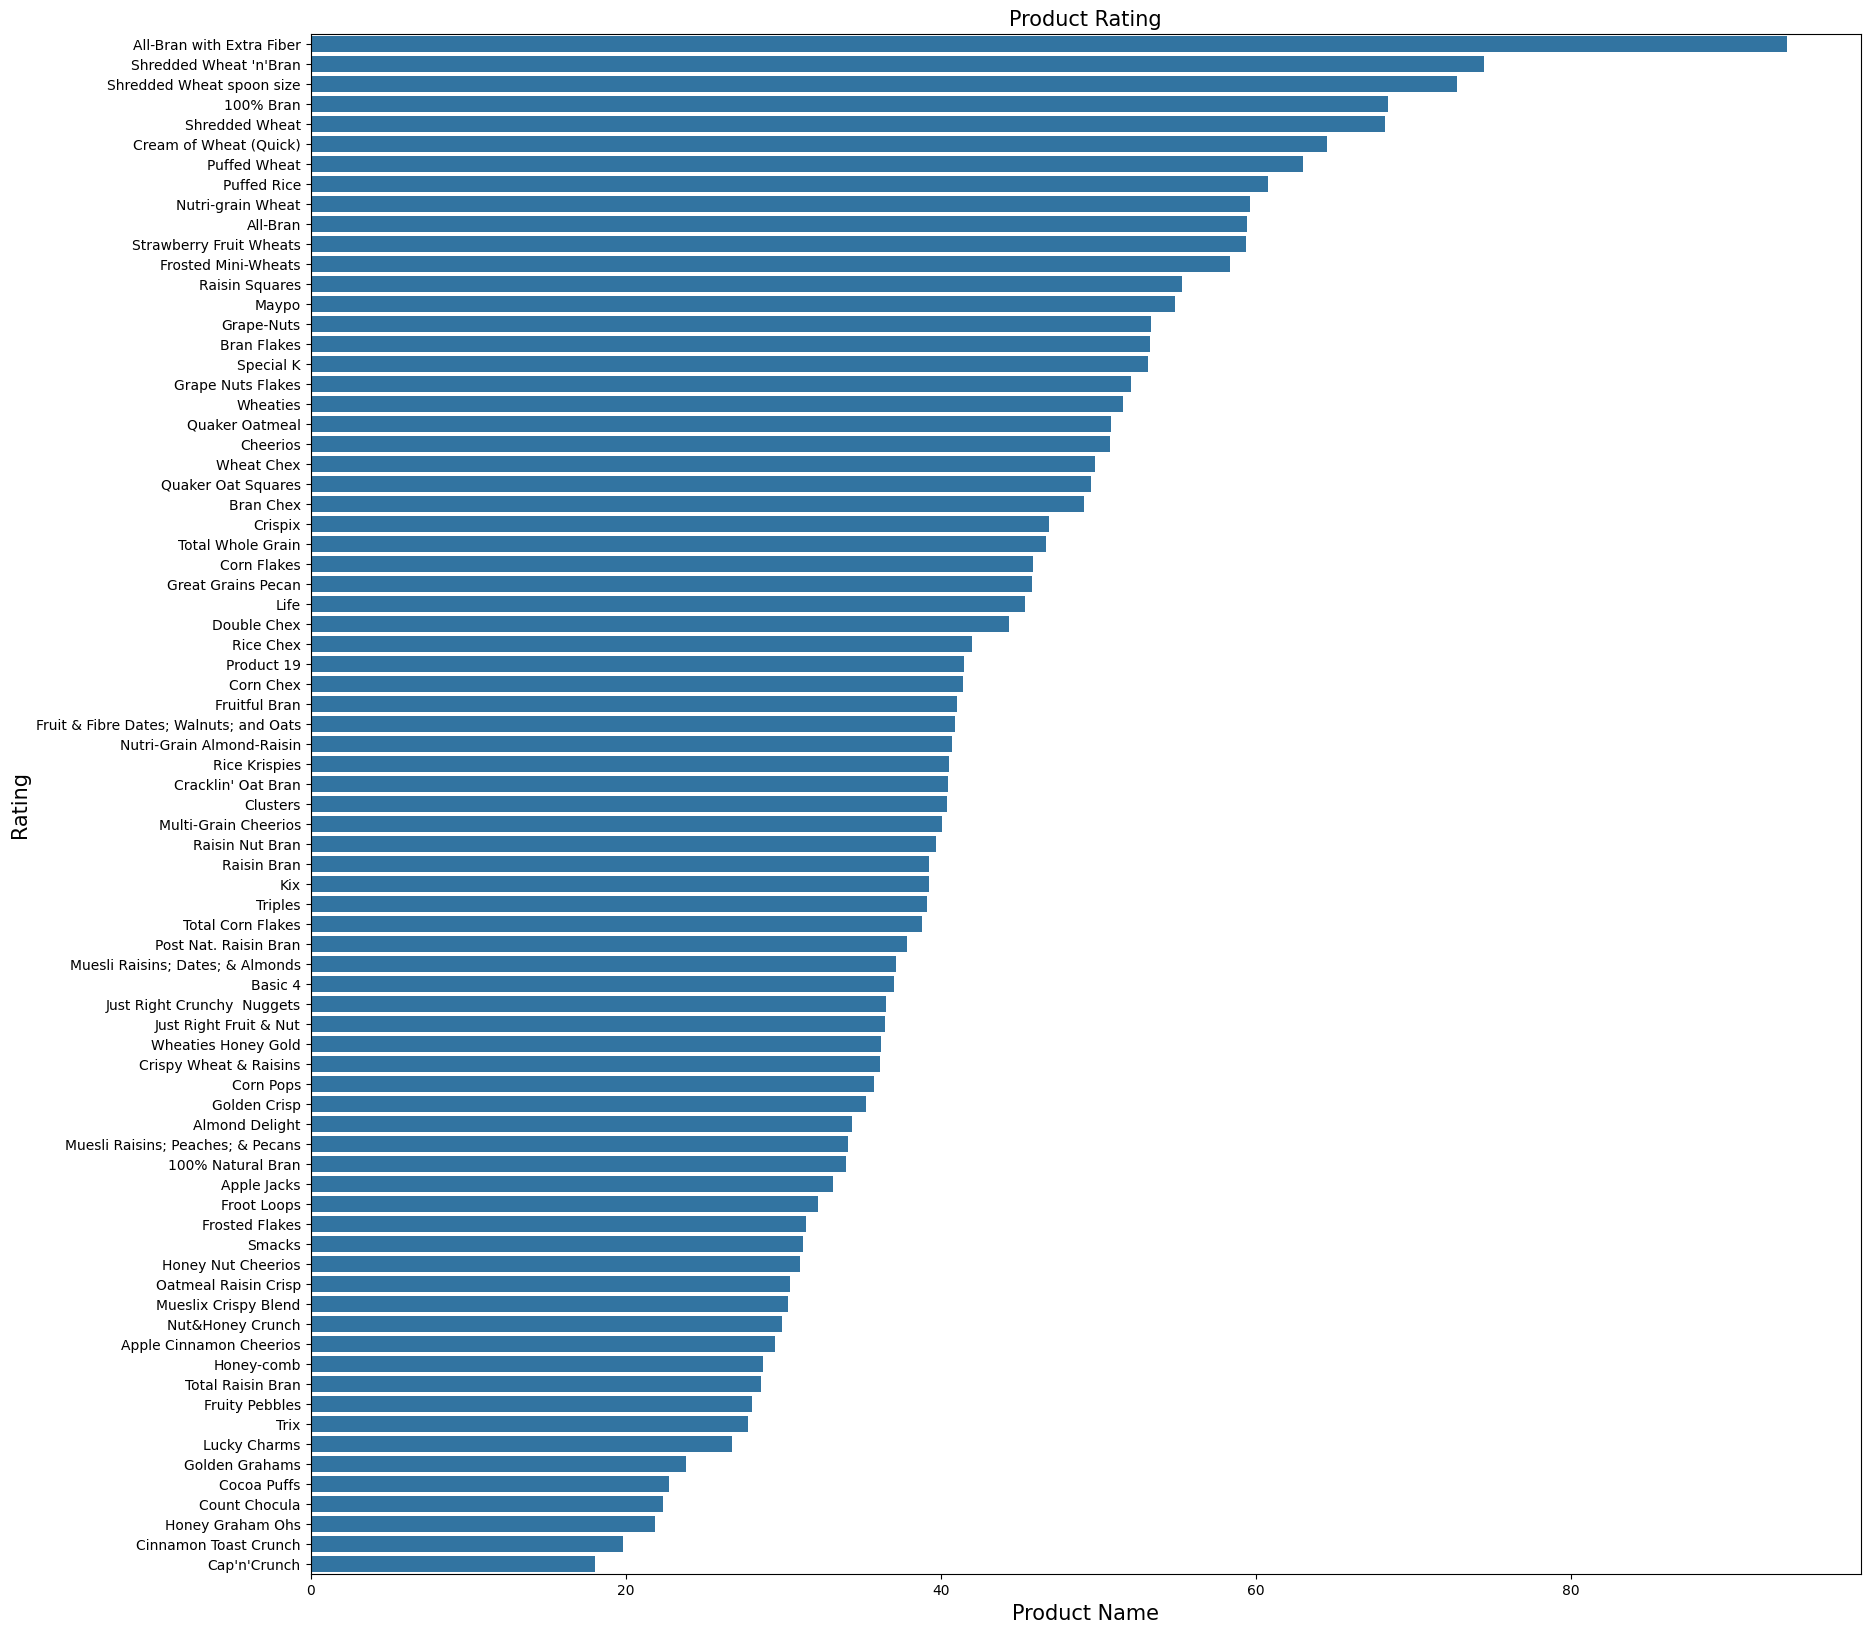

In [6]:
# Visualization product ranking
df = df.sort_values(['rating'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=df["rating"],y=df["name"])
plt.xlabel("Product Name",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.title("Product Rating",fontsize=15)
plt.show()

<ipython-input-7-e78559365b19>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, ax=axes[1], palette="Set2")


<Axes: xlabel='type', ylabel='count'>

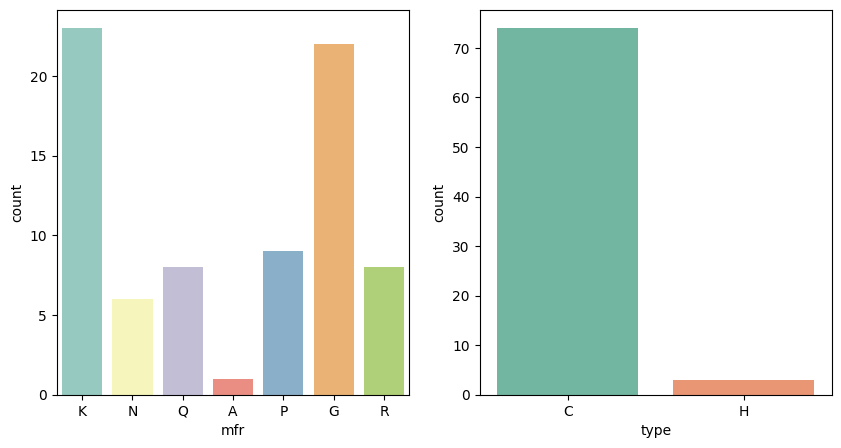

In [7]:
# Barcharts to understand the categorical variables
f, axes = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(x="mfr", data=df, ax=axes[0], palette="Set3")
sns.countplot(x="type", data=df, ax=axes[1], palette="Set2")

<ipython-input-9-cfa0651bc1c3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df["calories"], ax=axes[0,0])
<ipython-input-9-cfa0651bc1c3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df["protein"], ax=axes[0,1])
<ipython-input-9-cfa0651bc1c3>:5: UserWarning: 

`distplot` is a deprecated

<Axes: xlabel='weight', ylabel='Density'>

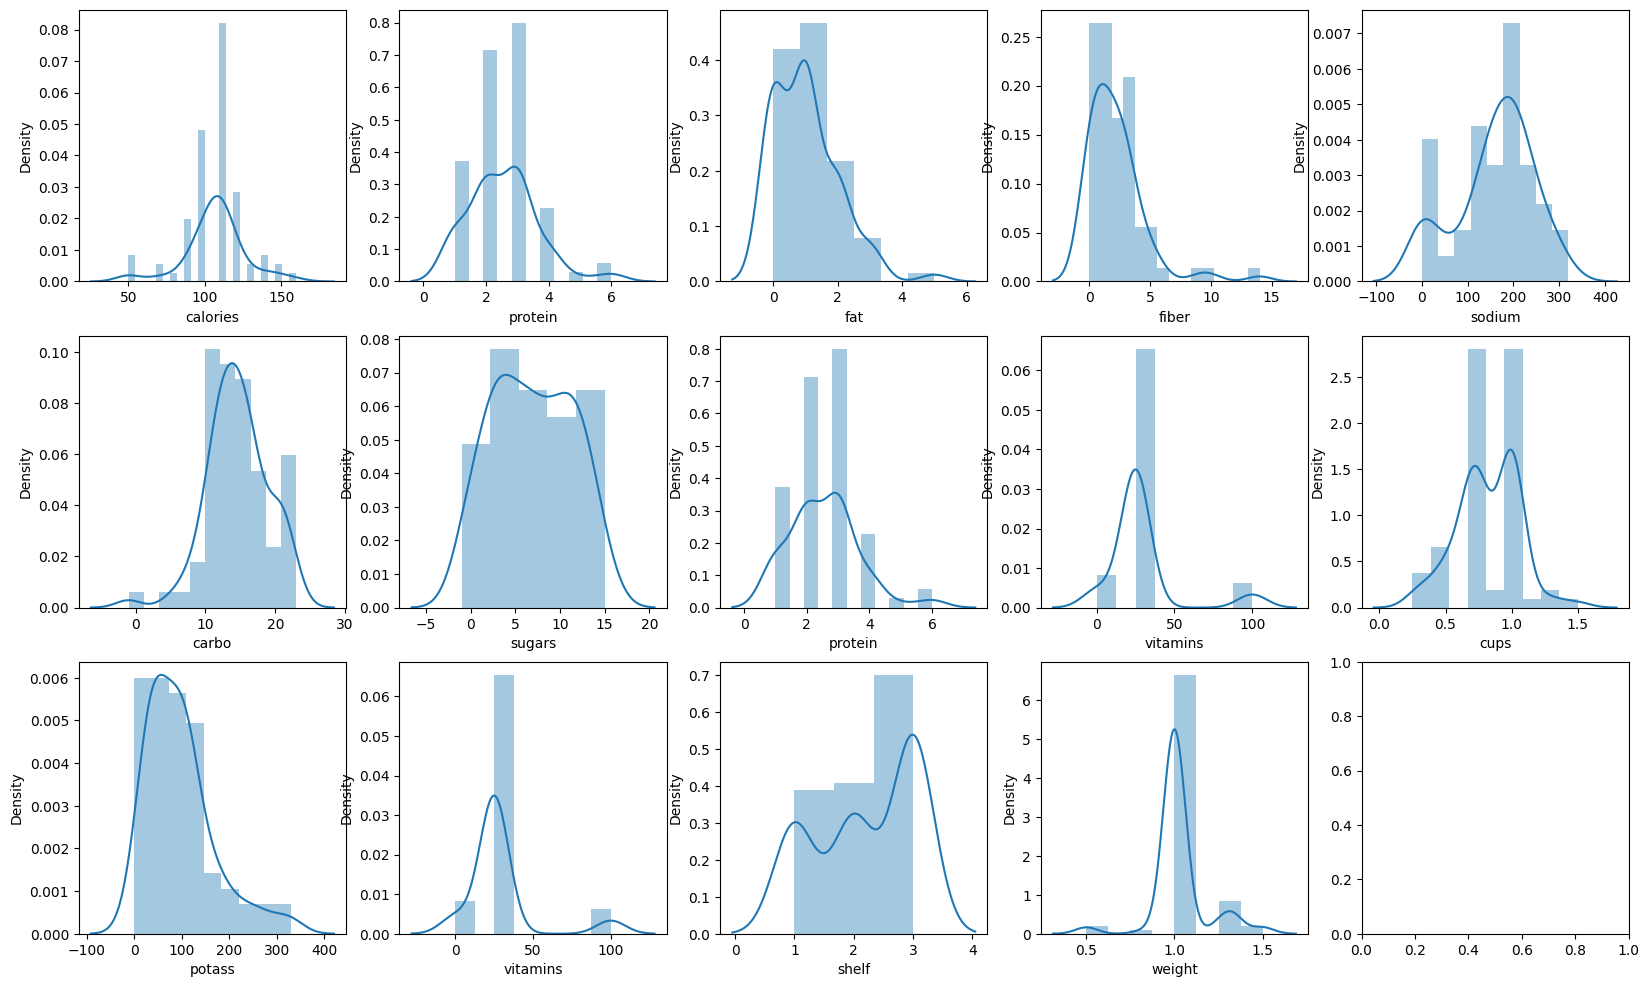

In [9]:
# Display the histogram to undestand the data
f, axes = plt.subplots(3,5, figsize=(20, 12))
sns.distplot( df["calories"], ax=axes[0,0])
sns.distplot( df["protein"], ax=axes[0,1])
sns.distplot( df["fat"], ax=axes[0,2])
sns.distplot( df["fiber"], ax=axes[0,3])
sns.distplot( df["sodium"], ax=axes[0,4])
sns.distplot( df["carbo"], ax=axes[1,0])
sns.distplot( df["sugars"], ax=axes[1,1])
sns.distplot( df["protein"], ax=axes[1,2])
sns.distplot( df["vitamins"], ax=axes[1,3])
sns.distplot( df["cups"], ax=axes[1,4])
sns.distplot( df["potass"], ax=axes[2,0])
sns.distplot( df["vitamins"], ax=axes[2,1])
sns.distplot( df["shelf"], ax=axes[2,2])
sns.distplot( df["weight"], ax=axes[2,3])

<Axes: xlabel='mfr', ylabel='cups'>

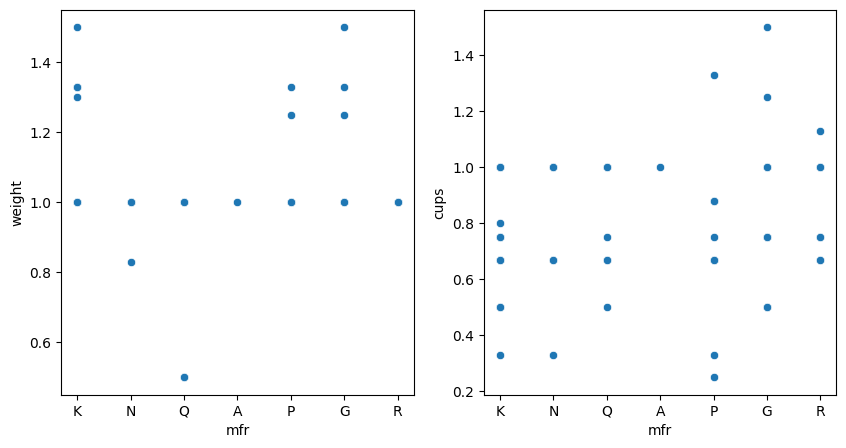

In [10]:
# Barcharts: are they comparable?
f, axes = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x="mfr", y="weight", data=df, ax=axes[0])
sns.scatterplot(x="mfr", y="cups", data=df, ax=axes[1])

It look like the nutritional facts are given by portion which varies by cereal. We need to make those variables comparable.

In [11]:
#How to normalize the values
df.loc[df['name'].isin(['All-Bran','Lucky Charms','Puffed Wheat'])]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
6,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.5,1.00,63.005645
9,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
70,Lucky Charms,G,C,110,2,1,180,0.0,12.0,12,55,25,2,1.0,1.00,26.734515


It looks like the best way to make them comparable is by weight.

In [12]:
# Normalize with weight
cereals = df.iloc[:,~df.columns.isin(['name','mfr','type','rating'])].div(df.weight, axis=0)
cereals = pd.concat([df.iloc[:,df.columns.isin(['name','mfr','type','rating'])] , cereals], axis=1)
cereals.head()

,name,mfr,type,rating,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,All-Bran with Extra Fiber,K,C,93.704912,50.000000,4.000000,0.0,140.0,14.000000,8.000000,0.0,330.000000,25.0,3.000000,1.0,0.500000
1,Shredded Wheat 'n'Bran,N,C,74.472949,90.000000,3.000000,0.0,0.0,4.000000,19.000000,0.0,140.000000,0.0,1.000000,1.0,0.670000
2,Shredded Wheat spoon size,N,C,72.801787,90.000000,3.000000,0.0,0.0,3.000000,20.000000,0.0,120.000000,0.0,1.000000,1.0,0.670000
3,100% Bran,N,C,68.402973,70.000000,4.000000,1.0,130.0,10.000000,5.000000,6.0,280.000000,25.0,3.000000,1.0,0.330000
4,Shredded Wheat,N,C,68.235885,96.385542,2.409639,0.0,0.0,3.614458,19.277108,0.0,114.457831,0.0,1.204819,1.0,1.204819


If not Lucky charms which variables make a cereal perform better in the rating.

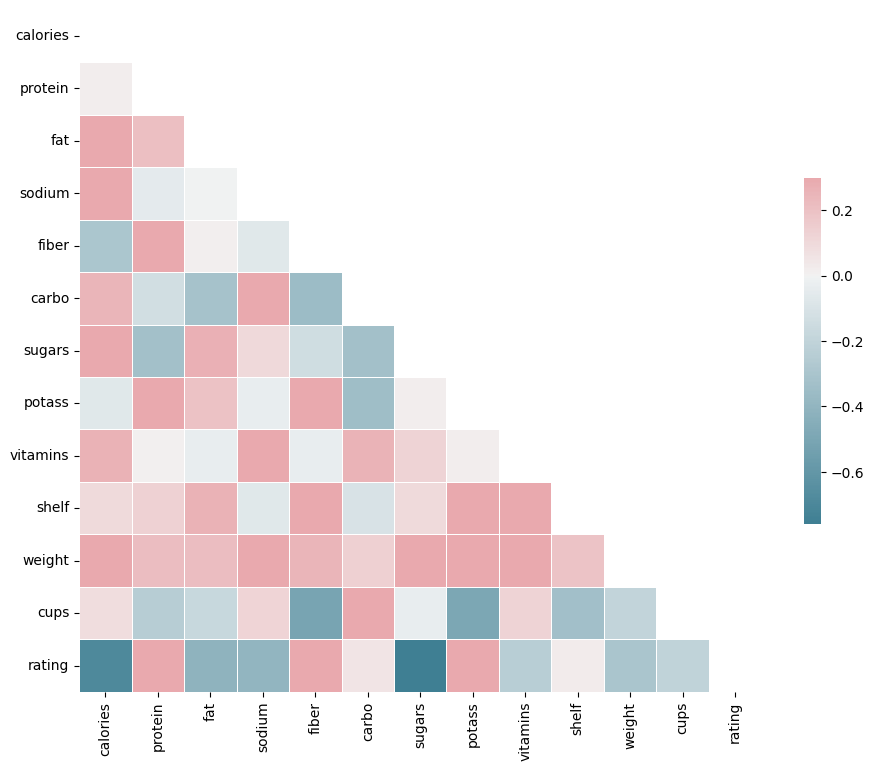

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame and cereals is another DataFrame
# Compute the correlation matrix
corr = df.iloc[:, ~df.columns.isin(['name', 'mfr', 'type'])].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


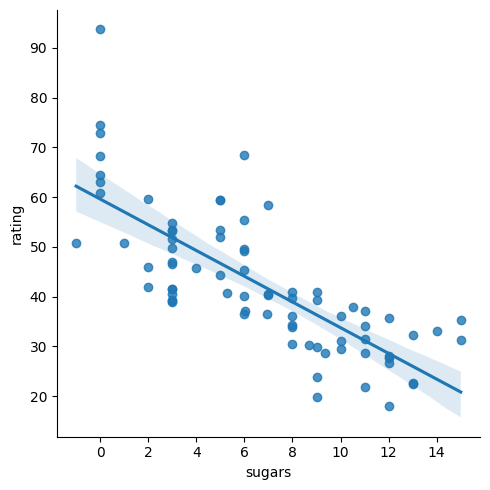

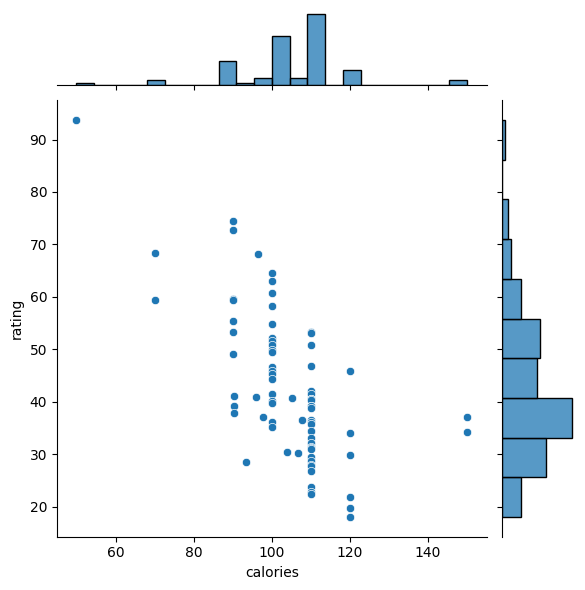

In [17]:
sns.lmplot(x="sugars",y="rating",data=cereals)
sns.jointplot(x="calories", y="rating", data=cereals)

### **Data Transformations**

 we have comparable variables across cereals let’s standardize those variables to have an holistic approach of a cereal in all its features. This allow us to create new features with the existing variables.

In [18]:
cereals_scale = cereals

scaler = preprocessing.StandardScaler()
columns =cereals.columns[3:]
cereals_scale[columns] = scaler.fit_transform(cereals_scale[columns])
cereals_scale.head()

,name,mfr,type,rating,calories,...,potass,vitamins,shelf,weight,cups
0,All-Bran with Extra Fiber,K,C,3.657211,-3.923731,...,3.717234,-0.091928,0.819649,0.0,-1.037360
1,Shredded Wheat 'n'Bran,N,C,2.279146,-1.017097,...,0.757082,-1.318770,-1.210975,0.0,-0.496150
2,Shredded Wheat spoon size,N,C,2.159399,-1.017097,...,0.445487,-1.318770,-1.210975,0.0,-0.496150
3,100% Bran,N,C,1.844202,-2.470414,...,2.938247,-0.091928,0.819649,0.0,-1.578569
4,Shredded Wheat,N,C,1.832229,-0.553086,...,0.359141,-1.318770,-1.003019,0.0,1.206492


### New Features

To evaluate each individual cereal we are going to create two new variables:

Measure of good/bad ingredients in each cereal
The ingredient that is more relevant in each cereal

In [19]:
#Finding the average of good and bad ingredients
cereals_scale['Good'] = cereals_scale.loc[:,['protein','fiber','vitamins']].mean(axis=1)
#Good: the bigger the better.
cereals_scale['Bad'] = cereals_scale.loc[:,['fat','sodium','potass', 'sugars']].mean(axis=1)
#Multiply by negative to make this indicator the bigger the worse.
cereals_scale.loc[cereals_scale['name'].isin(['All-Bran','Lucky Charms','Puffed Wheat'])]

,name,mfr,type,rating,calories,...,shelf,weight,cups,Good,Bad
6,Puffed Wheat,Q,C,1.457457,-0.290439,...,3.865585,0.0,3.738018,0.019794,-1.076849
9,All-Bran,K,C,1.200922,-2.470414,...,0.819649,0.0,-1.578569,1.448993,1.128843
70,Lucky Charms,G,C,-1.141548,0.436220,...,-0.195663,0.0,0.554433,-0.481615,0.276990


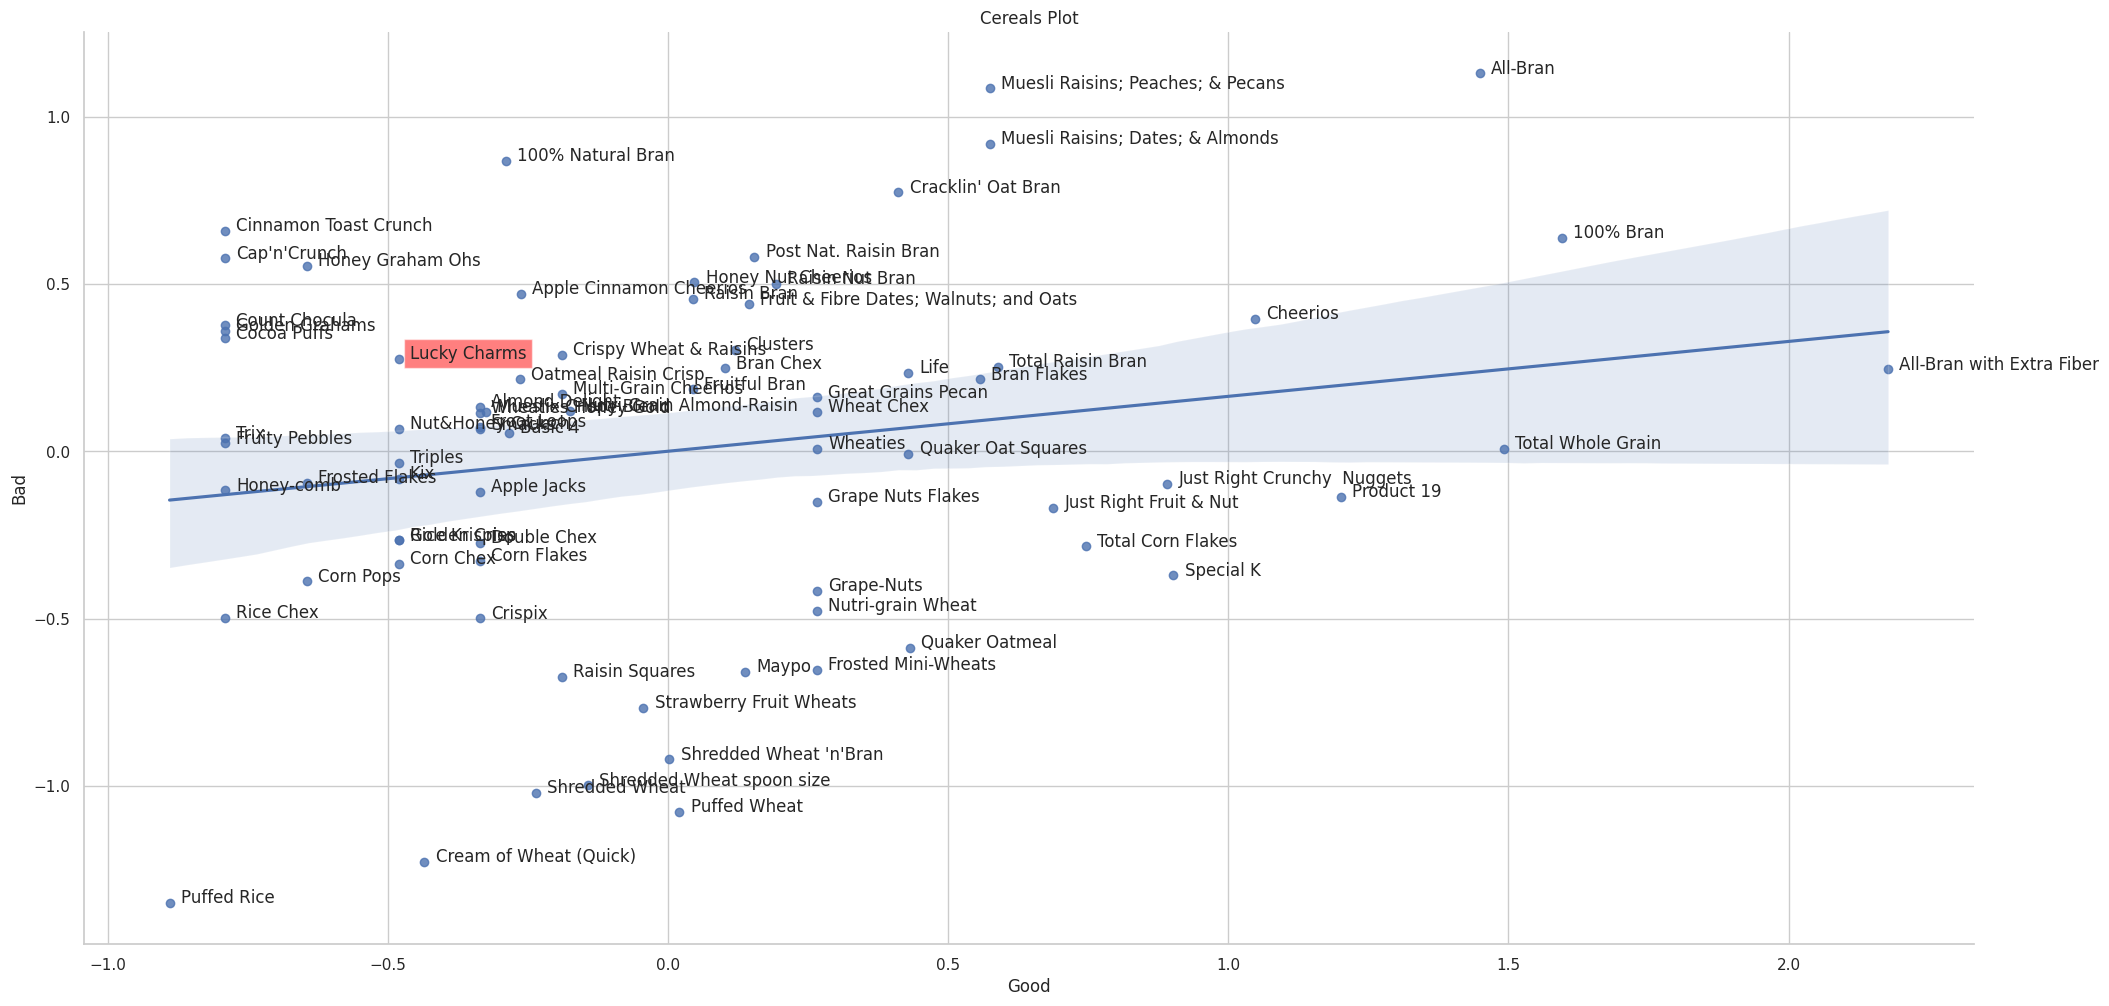

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming cereals_scale is your DataFrame

# Visualize the relationship between the good/bad ingredients measure
sns.set(style="whitegrid")
g = sns.lmplot(x='Good', y='Bad', data=cereals_scale, fit_reg=True, height=10, aspect=2)

plt.title('Cereals Plot')
# Set x-axis label
plt.xlabel('Good')
# Set y-axis label
plt.ylabel('Bad')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        if point['val'] == 'Lucky Charms':
            ax.text(point['x'] + .02, point['y'], str(point['val']), bbox=dict(facecolor='red', alpha=0.5))
        else:
            ax.text(point['x'] + .02, point['y'], str(point['val']))

label_point(cereals_scale.Good, cereals_scale.Bad, cereals_scale.name, plt.gca())

plt.show()


In this context, a linear regression frontier shows the relationship between good and bad nutrients from a cereal. No doubts the best cereal by its ingredients is All-Brand with extra Fiber and the worse is Cinnamon Toast Crunch. Lucky Charms is not that bad but is not that good either given that is over the line.

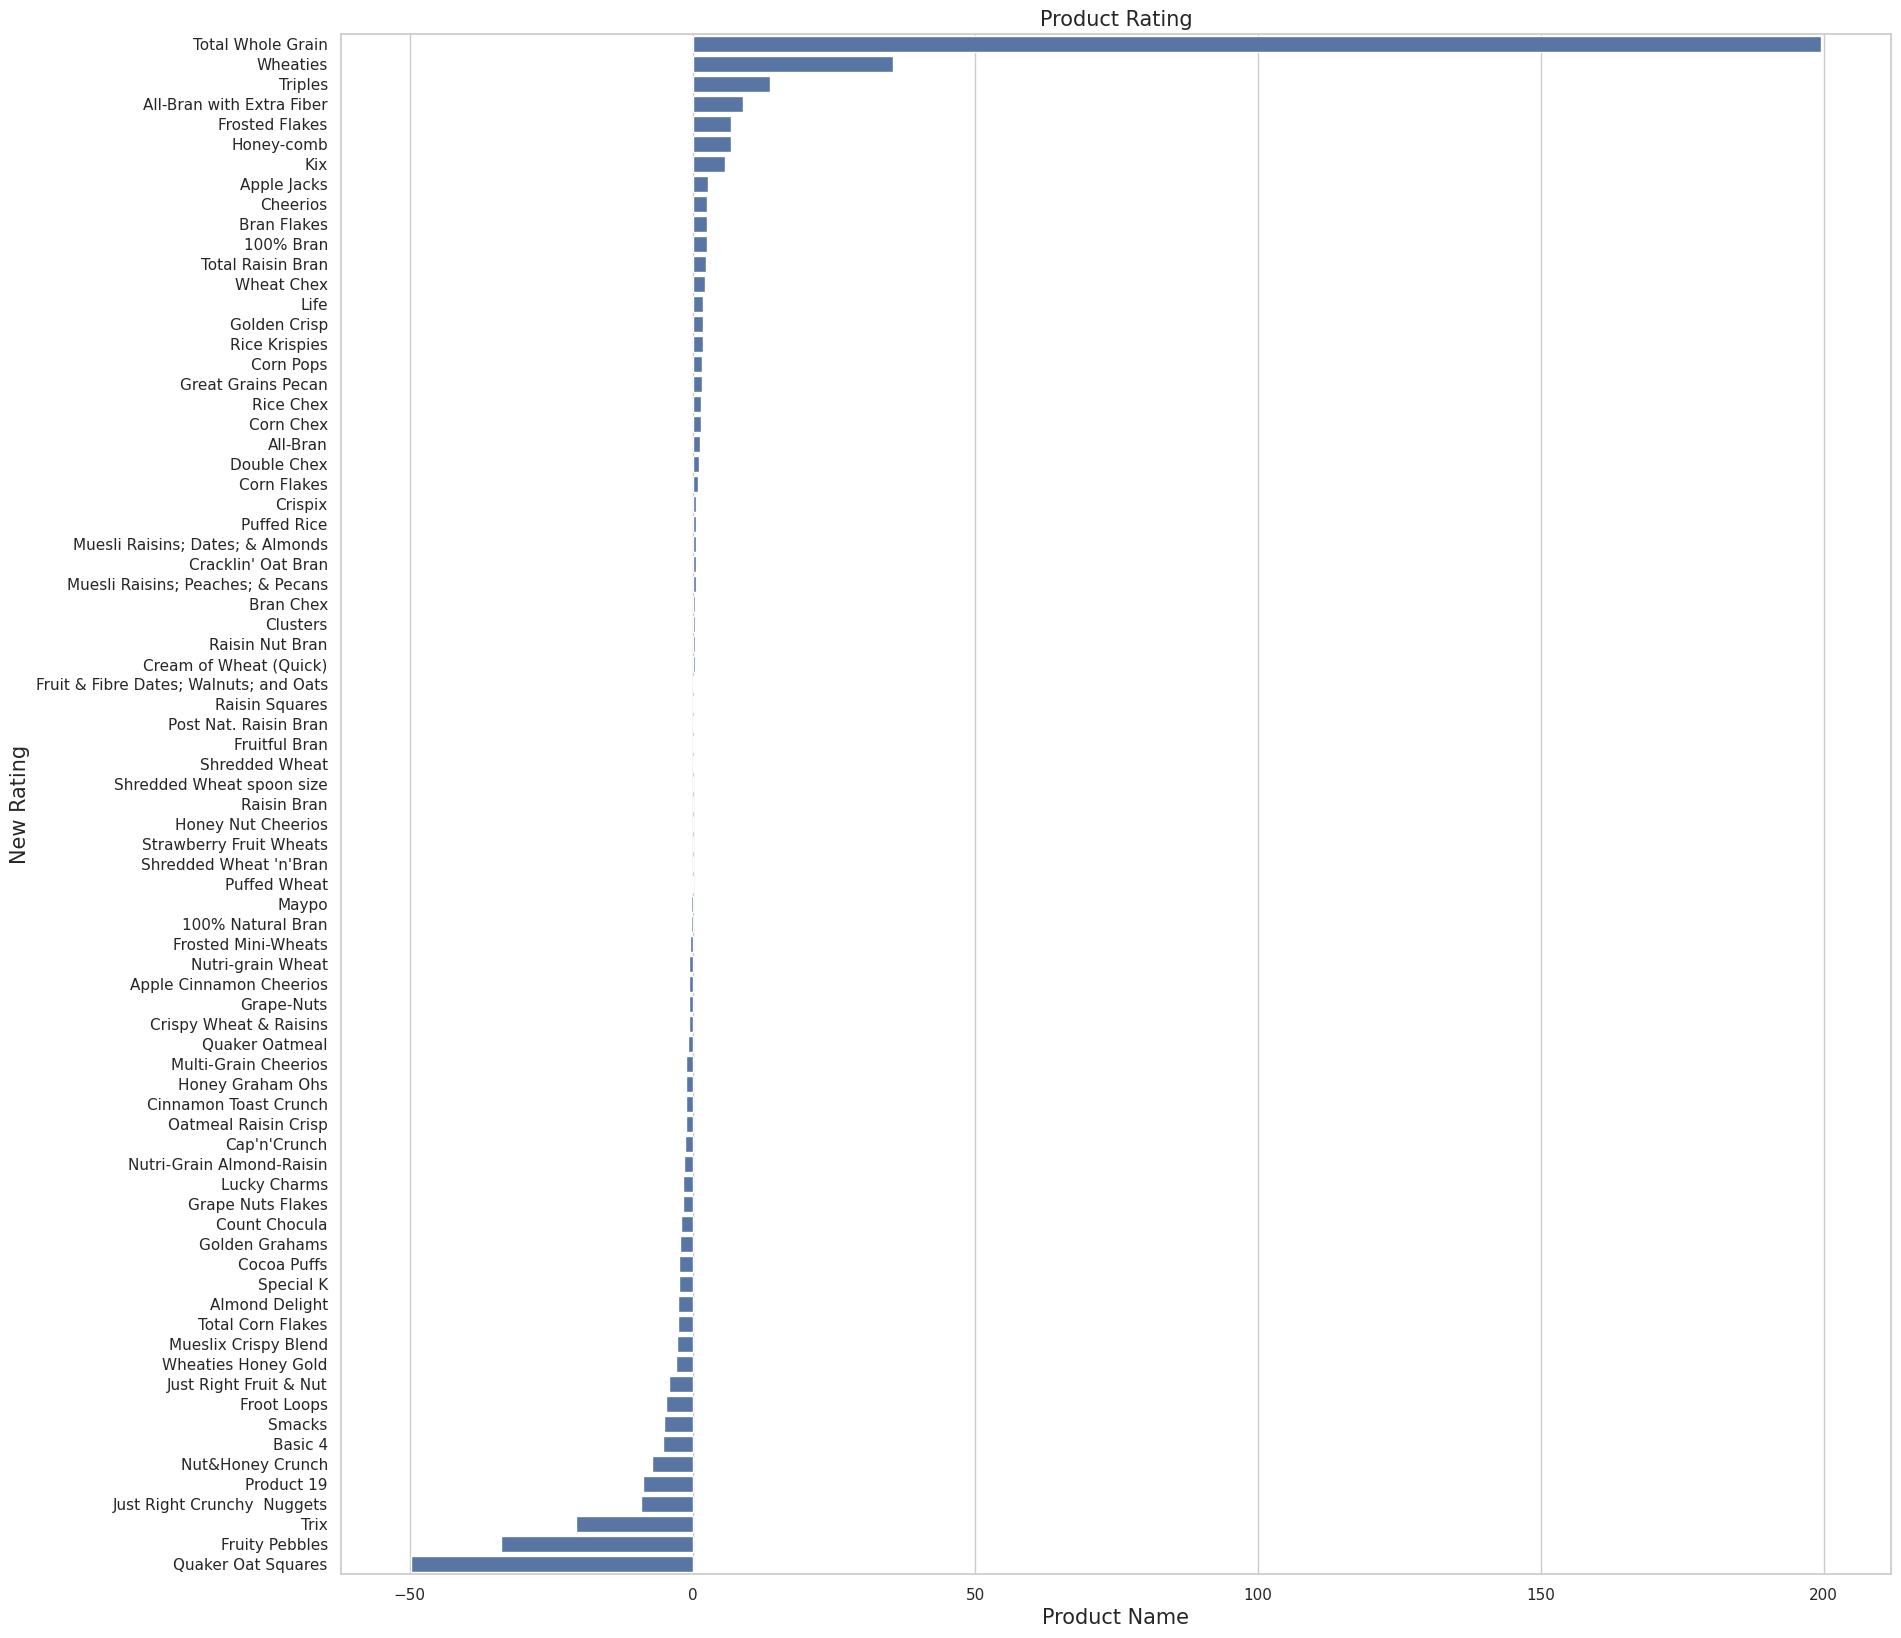

In [24]:
#Finding a proxy of Sharpe Ratio good/bad to make a new ranking.
cereals_scale['new_ranking'] = cereals_scale['Good']/cereals_scale['Bad']

# Visualization new ranking
new_cereals = cereals_scale.sort_values(['new_ranking'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=new_cereals["new_ranking"],y=new_cereals["name"])
plt.xlabel("Product Name",fontsize=15)
plt.ylabel("New Rating",fontsize=15)
plt.title("Product Rating",fontsize=15)
plt.show()

In [25]:
#Finding the most characteristic ingredient in each cereal
def knownby (row):
    maxValue = max(map(abs, pd.Series.tolist(row)[4:12]))
    try:
        index = pd.Series.tolist(row).index(maxValue)
    except ValueError:
        index = pd.Series.tolist(row).index(-maxValue)
    return index

cereals_scale['knowby']=cereals_scale.apply(lambda row: knownby (row),axis=1)
cereals_scale['knowby']=cereals_scale.columns[cereals_scale['knowby']]
cereals_scale.loc[cereals_scale['name'].isin(['All-Bran','Lucky Charms','Puffed Wheat'])]

,name,mfr,type,rating,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,Good,Bad,new_ranking,knowby
6,Puffed Wheat,Q,C,1.457457,-0.290439,1.400917,-0.989748,-1.865000,-0.022766,1.230143,-1.586540,0.133892,-1.318770,3.865585,0.0,3.738018,0.019794,-1.076849,-0.018381,sodium
9,All-Bran,K,C,1.200922,-2.470414,1.400917,0.033481,1.296909,3.037990,-1.637128,-0.376455,3.561437,-0.091928,0.819649,0.0,-1.578569,1.448993,1.128843,1.283609,potass
70,Lucky Charms,G,C,-1.141548,0.436220,-0.455649,0.033481,0.324014,-0.897267,-0.534331,1.317664,-0.567197,-0.091928,-0.195663,0.0,0.554433,-0.481615,0.276990,-1.738741,sugars


<ipython-input-26-0c55de71212b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="knowby", data=cereals_scale, palette="Set3")


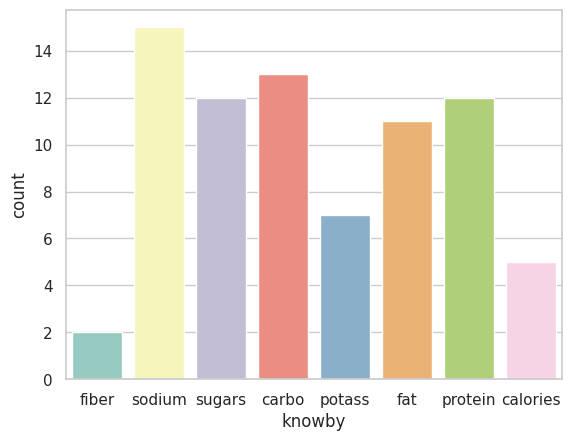

In [26]:
# Count of ingredients prevalence
ax = sns.countplot(x="knowby", data=cereals_scale, palette="Set3")

**conclusion**

It looks like the ingredient each cereal should be known for make them most of them look bad. Companies should consider adding more fiber and vitamins.